In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10,5.5)

In [4]:
usegt_ort = pd.read_csv('states_all_cleaned.csv', index_col=0)

In [5]:
usegt_ort

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915843.196105,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,...,57948.000000,58025.000000,41167.00000,4.715640e+05,1.963860e+05,6.761740e+05,208.327876,252.187522,207.963517,263.307067
1,1992_ALASKA,ALASKA,1992,915843.196105,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,...,9748.000000,8789.000000,6714.00000,7.911700e+04,3.084700e+04,1.123350e+05,218.410116,266.360319,212.712256,258.859712
2,1992_ARIZONA,ARIZONA,1992,915843.196105,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,...,55433.000000,49081.000000,37410.00000,4.371270e+05,1.752100e+05,6.148810e+05,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915843.196105,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,...,34632.000000,36011.000000,27651.00000,2.813380e+05,1.231130e+05,4.052590e+05,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915843.196105,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,...,418418.000000,363296.000000,270675.00000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,263.307067
5,1992_COLORADO,COLORADO,1992,915843.196105,3.185173e+06,1.632530e+05,1.307986e+06,1.713934e+06,3.264826e+06,1.642466e+06,...,50648.000000,45025.000000,34533.00000,3.949040e+05,1.602990e+05,5.626130e+05,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,915843.196105,3.834302e+06,1.435420e+05,1.342539e+06,2.348221e+06,3.721338e+06,2.148041e+06,...,38058.000000,33691.000000,28366.00000,3.042840e+05,1.269170e+05,4.369320e+05,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,915843.196105,6.452330e+05,4.594500e+04,4.209420e+05,1.783460e+05,6.387840e+05,3.727220e+05,...,8272.000000,8012.000000,6129.00000,6.749500e+04,2.833800e+04,9.629600e+04,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,915843.196105,7.094800e+05,6.474900e+04,0.000000e+00,6.447310e+05,7.428930e+05,3.291600e+05,...,5832.000000,5000.000000,3433.00000,4.700900e+04,1.817300e+04,7.000000e+04,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,915843.196105,1.150630e+07,7.884200e+05,5.683949e+06,5.033930e+06,1.130564e+07,5.166374e+06,...,164416.000000,142372.000000,100835.00000,1.276685e+06,5.115570e+05,1.819706e+06,213.689751,259.908848,204.882606,262.118986


In [8]:
usegt_ort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

In [7]:
usegt_ort.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.161423e+05,9.084050e+06,7.662410e+05,4.213552e+06,4.104257e+06,9.190416e+06,4.758239e+06,...,64589.633079,64329.810352,54414.865677,5.196162e+05,2.474808e+05,8.028954e+05,234.158662,277.962806,218.641162,263.556182
std,NaN,NaN,7.393983,9.668532e+05,1.091052e+07,1.066339e+06,5.146846e+06,5.092087e+06,1.112554e+07,5.844447e+06,...,76686.131879,75365.784216,64848.470458,6.147223e+05,2.938945e+05,9.126983e+05,6.581897,6.288270,4.717235,3.949485
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,234.154652,277.962829,218.644280,263.568686
50%,NaN,NaN,2004.000000,8.083635e+05,6.077218e+06,4.708280e+05,2.946394e+06,2.565186e+06,6.179938e+06,3.168123e+06,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,234.154652,277.962829,218.644280,263.568686
75%,NaN,NaN,2011.000000,9.486075e+05,1.109366e+07,8.697107e+05,5.050045e+06,4.827849e+06,1.086951e+07,5.632717e+06,...,71814.250000,72131.000000,64898.890909,5.749118e+05,2.825390e+05,8.830054e+05,234.184508,277.962829,218.644280,263.568686


In [38]:
baslikfont = {'family':'arial', 'color':'darkred', 'weight':'bold', 'size':13}
eksenfont = {'family': 'sans', 'color':'darkblue', 'weight': 'bold', 'size':11}

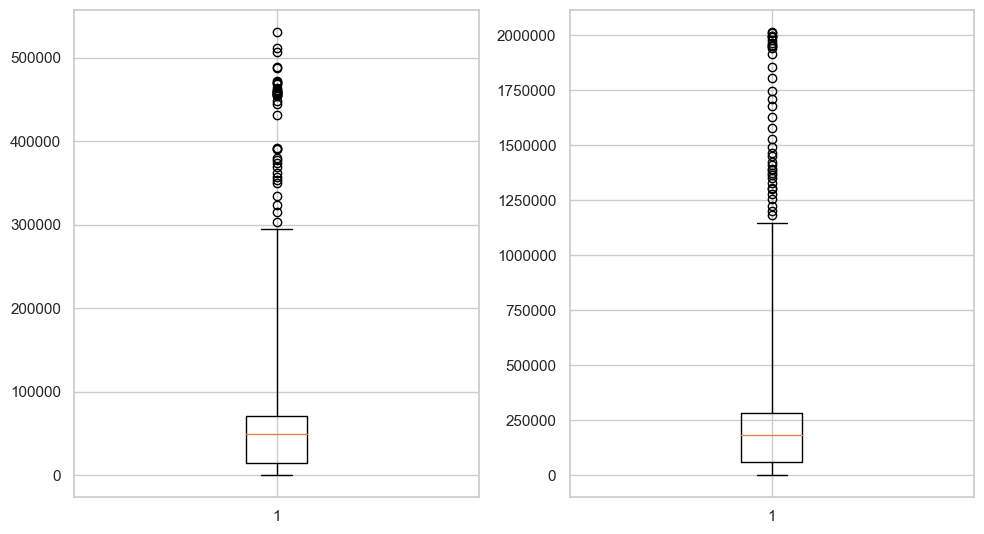

In [76]:
usegt_ort['GRADES_KG_G']
usegt_ort['GRADES_9_12_G']
plt.subplot(121)
plt.boxplot(usegt_ort['GRADES_KG_G'], whis=4)

plt.subplot(122)
plt.boxplot(usegt_ort['GRADES_9_12_G'], whis=4)

plt.tight_layout()
plt.show()

In [55]:
analiz = pd.DataFrame() #WE have selected two variables to analysis
analiz['GRADES_KG_G'] = usegt_ort['GRADES_KG_G']
analiz['GRADES_9_12_G'] = usegt_ort['GRADES_9_12_G']

In [56]:
analiz['wins_GRADES_KG_G'] = winsorize(analiz['GRADES_KG_G'], (0, 0.10))
analiz['wins_GRADES_9_12_G'] = winsorize(analiz['GRADES_9_12_G'], (0, 0.10))

analiz['log_GRADES_KG_G'] = np.log(analiz['GRADES_KG_G'])
analiz['log_GRADES_9_12_G'] = np.log(analiz['GRADES_9_12_G'])

In [57]:
analiz.describe() #two variables have been analysed as EDA:grades_k_g and grades_9_12_g

,GRADES_KG_G,GRADES_9_12_G,wins_GRADES_KG_G,wins_GRADES_9_12_G,log_GRADES_KG_G,log_GRADES_9_12_G
count,1492.000000,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,63811.024733,2.474808e+05,52899.755296,207787.776156,10.440104,11.785553
std,76575.182543,2.938945e+05,40561.563439,162561.982286,1.290937,1.319853
min,544.000000,1.808000e+03,544.000000,1808.000000,6.298949,7.499977
25%,14016.000000,5.919750e+04,14016.000000,59197.500000,9.547955,10.988631
50%,48897.000000,1.817010e+05,48897.000000,181701.000000,10.797471,12.110118
75%,70428.611111,2.825390e+05,70428.611111,282539.000000,11.162355,12.551572
max,530531.000000,2.013687e+06,131323.000000,535452.000000,13.181634,14.515478


In [58]:
us_calif = usegt_ort[usegt_ort['STATE']=='CALIFORNIA'].groupby(['YEAR']).mean()
#titan.groupby(['Sex'])['Age'].mean()
us_calif['YEAR'] = us_calif.index
us_calif

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,YEAR
YEAR,,,,,,,,,,,,,,,,,,,,,
1992,9.158432e+05,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,4.288665e+05,2.044688e+06,...,363296.000000,270675.00000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,263.307067,1992
1993,5.129788e+06,2.804334e+07,2.151157e+06,1.706415e+07,8.828035e+06,2.811099e+07,1.528115e+07,8.914559e+06,1.608514e+06,1.944760e+06,...,380223.000000,277271.00000,3.328627e+06,1.393530e+06,4.782111e+06,234.154652,277.962829,218.644280,263.568686,1993
1994,4.120498e+06,2.344084e+07,2.095878e+06,1.317555e+07,8.169417e+06,2.301269e+07,1.244386e+07,6.754346e+06,1.615630e+06,1.916061e+06,...,388561.000000,285132.00000,3.372294e+06,1.421547e+06,4.860291e+06,234.154652,277.962829,218.644280,263.568686,1994
1995,5.299405e+06,2.951221e+07,2.612241e+06,1.554149e+07,1.135849e+07,3.009755e+07,1.614642e+07,8.603751e+06,2.181053e+06,2.669270e+06,...,399039.000000,287428.00000,3.430751e+06,1.464841e+06,4.964774e+06,234.154652,277.962829,218.644280,263.568686,1995
1996,5.460484e+06,3.128298e+07,2.603882e+06,1.706147e+07,1.161762e+07,3.156169e+07,1.688073e+07,9.222569e+06,2.362407e+06,2.580639e+06,...,406456.000000,298669.00000,3.516572e+06,1.525618e+06,5.115423e+06,209.129083,262.772478,201.912591,269.197451,1996
1997,5.595836e+06,3.561493e+07,2.850766e+06,2.056073e+07,1.220344e+07,3.386228e+07,1.816044e+07,1.004040e+07,1.792979e+06,3.088674e+06,...,412604.000000,317595.00000,3.591033e+06,1.578929e+06,5.246546e+06,234.154652,277.962829,218.644280,263.568686,1997
1998,5.727224e+06,3.918302e+07,3.149260e+06,2.284050e+07,1.319326e+07,3.808767e+07,2.008391e+07,1.093906e+07,1.862674e+06,4.335730e+06,...,424768.000000,334852.00000,3.666271e+06,1.627284e+06,5.375481e+06,234.154652,277.962829,218.644280,263.568686,1998
1999,5.839207e+06,4.139344e+07,3.599923e+06,2.369510e+07,1.409842e+07,4.083464e+07,2.111054e+07,1.153991e+07,1.954362e+06,4.738866e+06,...,431730.000000,347914.00000,3.734997e+06,1.675778e+06,5.496767e+06,234.154652,277.962829,218.644280,263.568686,1999
2000,5.941946e+06,4.662821e+07,4.024940e+06,2.687792e+07,1.572535e+07,4.582975e+07,2.351439e+07,1.242907e+07,2.269603e+06,5.849441e+06,...,441877.000000,357789.00000,3.804640e+06,1.707952e+06,5.602511e+06,213.565125,262.171027,205.916588,264.494066,2000


In [59]:
us_calif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1992 to 2017
Data columns (total 23 columns):
ENROLL                          26 non-null float64
TOTAL_REVENUE                   26 non-null float64
FEDERAL_REVENUE                 26 non-null float64
STATE_REVENUE                   26 non-null float64
LOCAL_REVENUE                   26 non-null float64
TOTAL_EXPENDITURE               26 non-null float64
INSTRUCTION_EXPENDITURE         26 non-null float64
SUPPORT_SERVICES_EXPENDITURE    26 non-null float64
OTHER_EXPENDITURE               26 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      26 non-null float64
GRADES_PK_G                     26 non-null float64
GRADES_KG_G                     26 non-null float64
GRADES_4_G                      26 non-null float64
GRADES_8_G                      26 non-null float64
GRADES_12_G                     26 non-null float64
GRADES_1_8_G                    26 non-null float64
GRADES_9_12_G                   26 non-null float64
GRADES_A

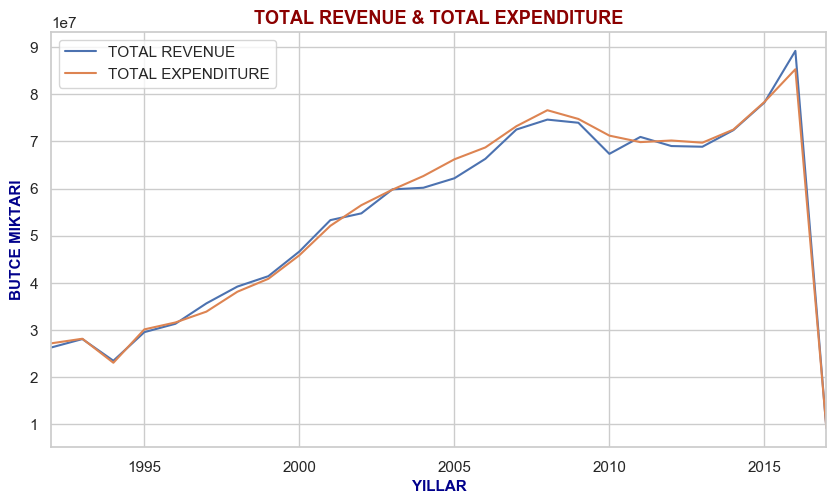

In [60]:
us_calif.plot(x='YEAR', y=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])

plt.title('TOTAL REVENUE & TOTAL EXPENDITURE', fontdict=baslikfont )
plt.ylabel('BUTCE MIKTARI', fontdict=eksenfont )
plt.xlabel('YILLAR', fontdict=eksenfont )
plt.legend(('TOTAL REVENUE', 'TOTAL EXPENDITURE'))
        
plt.show()

In [72]:
us_calif1 = usegt_ort[usegt_ort['STATE']=='CALIFORNIA']
us_calif1

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,9.158432e+05,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,...,418418.000000,363296.000000,270675.00000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,263.307067
55,1993_CALIFORNIA,CALIFORNIA,1993,5.129788e+06,2.804334e+07,2.151157e+06,1.706415e+07,8.828035e+06,2.811099e+07,1.528115e+07,...,420233.000000,380223.000000,277271.00000,3.328627e+06,1.393530e+06,4.782111e+06,234.154652,277.962829,218.644280,263.568686
106,1994_CALIFORNIA,CALIFORNIA,1994,4.120498e+06,2.344084e+07,2.095878e+06,1.317555e+07,8.169417e+06,2.301269e+07,1.244386e+07,...,426919.000000,388561.000000,285132.00000,3.372294e+06,1.421547e+06,4.860291e+06,234.154652,277.962829,218.644280,263.568686
157,1995_CALIFORNIA,CALIFORNIA,1995,5.299405e+06,2.951221e+07,2.612241e+06,1.554149e+07,1.135849e+07,3.009755e+07,1.614642e+07,...,428553.000000,399039.000000,287428.00000,3.430751e+06,1.464841e+06,4.964774e+06,234.154652,277.962829,218.644280,263.568686
208,1996_CALIFORNIA,CALIFORNIA,1996,5.460484e+06,3.128298e+07,2.603882e+06,1.706147e+07,1.161762e+07,3.156169e+07,1.688073e+07,...,435217.000000,406456.000000,298669.00000,3.516572e+06,1.525618e+06,5.115423e+06,209.129083,262.772478,201.912591,269.197451
259,1997_CALIFORNIA,CALIFORNIA,1997,5.595836e+06,3.561493e+07,2.850766e+06,2.056073e+07,1.220344e+07,3.386228e+07,1.816044e+07,...,451069.000000,412604.000000,317595.00000,3.591033e+06,1.578929e+06,5.246546e+06,234.154652,277.962829,218.644280,263.568686
310,1998_CALIFORNIA,CALIFORNIA,1998,5.727224e+06,3.918302e+07,3.149260e+06,2.284050e+07,1.319326e+07,3.808767e+07,2.008391e+07,...,462241.000000,424768.000000,334852.00000,3.666271e+06,1.627284e+06,5.375481e+06,234.154652,277.962829,218.644280,263.568686
361,1999_CALIFORNIA,CALIFORNIA,1999,5.839207e+06,4.139344e+07,3.599923e+06,2.369510e+07,1.409842e+07,4.083464e+07,2.111054e+07,...,489356.000000,431730.000000,347914.00000,3.734997e+06,1.675778e+06,5.496767e+06,234.154652,277.962829,218.644280,263.568686
412,2000_CALIFORNIA,CALIFORNIA,2000,5.941946e+06,4.662821e+07,4.024940e+06,2.687792e+07,1.572535e+07,4.582975e+07,2.351439e+07,...,489043.000000,441877.000000,357789.00000,3.804640e+06,1.707952e+06,5.602511e+06,213.565125,262.171027,205.916588,264.494066
463,2001_CALIFORNIA,CALIFORNIA,2001,6.045030e+06,5.328894e+07,4.280358e+06,3.137489e+07,1.763370e+07,5.208254e+07,2.664181e+07,...,485301.000000,461133.000000,365907.00000,3.871843e+06,1.745295e+06,5.717489e+06,234.154652,277.962829,218.644280,263.568686


In [63]:
us_calif1.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,...,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000,26.000000
mean,2004.500000,5.558458e+06,5.400240e+07,5.595382e+06,2.994017e+07,1.846685e+07,5.443780e+07,2.699356e+07,1.571567e+07,2.716824e+06,...,433819.311962,421403.842939,373190.047912,3.457652e+06,1.666648e+06,5.012723e+06,230.560602,274.321158,214.103508,262.917841
std,7.648529,1.453650e+06,2.080162e+07,2.772346e+06,1.130399e+07,7.119626e+06,2.107037e+07,9.708098e+06,6.148351e+06,9.980280e+05,...,110968.161866,112070.859884,123076.446428,8.830619e+05,4.695761e+05,1.599574e+06,7.669923,5.614781,6.383365,3.030119
min,1992.000000,9.158432e+05,9.082425e+06,7.652836e+05,4.212276e+06,4.104866e+06,9.186415e+06,4.758144e+06,2.677347e+06,4.288665e+05,...,64582.555508,64303.458209,54371.122860,5.195636e+05,2.473113e+05,7.825623e+05,208.398961,260.892247,196.764414,254.895247
25%,1998.250000,5.628683e+06,3.650696e+07,2.925390e+06,2.113067e+07,1.245089e+07,3.491863e+07,1.864130e+07,1.026507e+07,2.011035e+06,...,439180.000000,407993.000000,303400.500000,3.535187e+06,1.538946e+06,5.002436e+06,231.580741,271.028892,210.161463,263.372472
50%,2004.500000,6.202819e+06,5.998909e+07,6.214862e+06,3.268723e+07,2.025660e+07,6.119892e+07,2.959327e+07,1.718461e+07,3.021886e+06,...,466585.500000,465644.500000,390187.500000,3.749212e+06,1.830786e+06,5.751751e+06,234.154652,277.962829,218.644280,263.568686
75%,2010.750000,6.226545e+06,7.046910e+07,7.522644e+06,3.767445e+07,2.372405e+07,7.096830e+07,3.454927e+07,2.064027e+07,3.487798e+06,...,483432.750000,475867.500000,477916.250000,3.803901e+06,1.962145e+06,5.828984e+06,234.154652,277.962829,218.644280,263.568686
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.060362e+07,8.532013e+07,4.258727e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,234.164993,277.962829,218.644280,269.197451


In [70]:
us_calif1_scores = pd.DataFrame()
us_calif1_scores['MATH_4'], us_calif1_scores['MATH_8']  = us_calif1['AVG_MATH_4_SCORE'], us_calif1['AVG_MATH_8_SCORE'], 

us_calif1_scores['READING_4'], us_calif1_scores['READING_8']=us_calif1['AVG_READING_4_SCORE'], us_calif1['AVG_READING_8_SCORE']
us_calif1_scores.index=range(26)
us_calif1_scores

,MATH_4,MATH_8,READING_4,READING_8
0,208.398961,260.892247,196.764414,263.307067
1,234.154652,277.962829,218.644280,263.568686
2,234.154652,277.962829,218.644280,263.568686
3,234.154652,277.962829,218.644280,263.568686
4,209.129083,262.772478,201.912591,269.197451
5,234.154652,277.962829,218.644280,263.568686
6,234.154652,277.962829,218.644280,263.568686
7,234.154652,277.962829,218.644280,263.568686
8,213.565125,262.171027,205.916588,264.494066
9,234.154652,277.962829,218.644280,263.568686


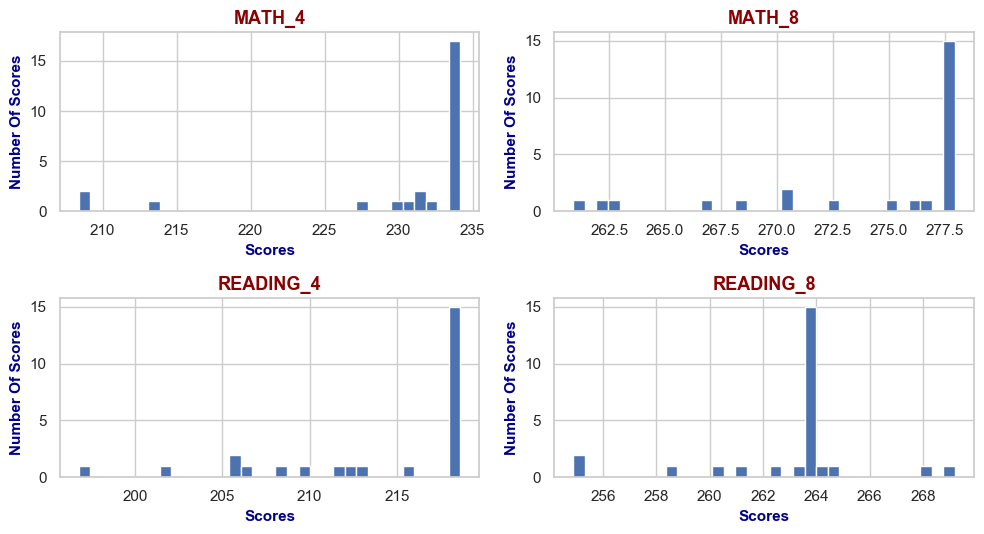

In [79]:
count=0 # distribution of math-reading scores of california
for i in us_calif1_scores:
    count+=1
    plt.subplot(2,2,count)
    plt.hist(us_calif1_scores[i], bins=33)
    plt.title(i, fontdict=baslikfont )
    plt.ylabel('Number Of Scores', fontdict=eksenfont )
    plt.xlabel('Scores', fontdict=eksenfont )
plt.tight_layout()
plt.show() #math and reading scores of state of california have unidentified distribution ..

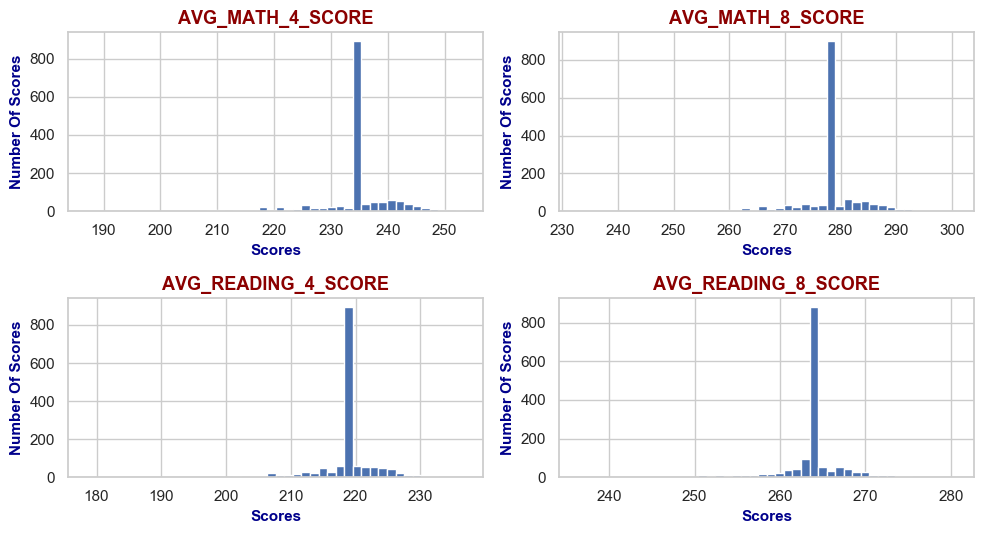

In [100]:
count=0 # distribution of math-reading scores of all states of us
b=list(usegt_ort.columns[21:25])
for i in b:
    count+=1
    plt.subplot(2,2,count)
    plt.hist(usegt_ort[i], bins=44)
    plt.title(i, fontdict=baslikfont )
    plt.ylabel('Number Of Scores', fontdict=eksenfont )
    plt.xlabel('Scores', fontdict=eksenfont )
plt.tight_layout()
plt.show()

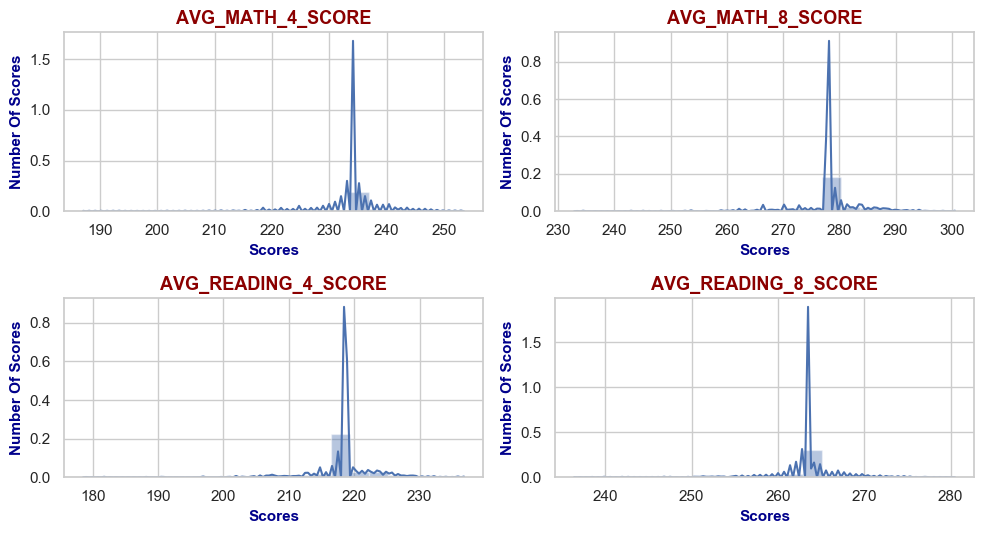

In [108]:
count=0 # distribution of math-reading scores of all states of us
b=list(usegt_ort.columns[21:25])
for i in b:
    count+=1
    plt.subplot(2,2,count)
    sns.distplot(usegt_ort[i], bins=20)
    plt.title(i, fontdict=baslikfont )
    plt.ylabel('Number Of Scores', fontdict=eksenfont )
    plt.xlabel('Scores', fontdict=eksenfont )
plt.tight_layout()
plt.show()